In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [66]:
dataset = 'pdbbind'

# target vs. pred용 dataset
os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result\MAE')
df_outer_MAE = pd.read_csv('result_' + dataset + '_outer.csv')
# df_egcn_MAE = pd.read_csv('result_' + dataset + '_egcn.csv')

os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result\MSE')
df_outer_MSE = pd.read_csv('result_' + dataset + '_outer.csv')
# df_egcn_MSE = pd.read_csv('result_' + dataset + '_egcn.csv')

# df_outer_train_MSE = pd.read_csv(r'C:\Programming\Github\EGCN\result_train.csv', header = None)

print(df_outer_MAE.shape[1])
print(df_outer_MSE.shape[1])
# print(df_outer_train_MSE.shape[1])

40
40


In [67]:
# MAE 컬럼명 추가
columns = ['target', 'pred'] + [f'feature{i}' for i in range(1, df_outer_MAE.shape[1]-1)]
df_outer_MAE.columns = columns

# columns = ['target', 'pred'] + [f'feature{i}' for i in range(1, df_egcn_MAE.shape[1]-1)]
# df_egcn_MAE.columns = columns

# MSE 컬럼명 추가
columns = ['target', 'pred'] + [f'feature{i}' for i in range(1, df_outer_MSE.shape[1]-1)]
df_outer_MSE.columns = columns

# columns = ['target', 'pred'] + [f'feature{i}' for i in range(1, df_egcn_MSE.shape[1]-1)]
# df_egcn_MSE.columns = columns

# Scatter plot (MAE) - 2개 comb

In [68]:
# df_outer_MAE['source'] = 'outer'
# df_egcn_MAE['source'] = 'egcn'
# df_combined = pd.concat([df_outer_MAE, df_egcn_MAE], ignore_index = True)

# plt.figure(figsize = (8, 6))

# from matplotlib.colors import ListedColormap
# pastel_cmap = ListedColormap(["#FF4500", "#20B2AA"])


# scatter = plt.scatter(df_combined['target'], df_combined['pred'],
#             c = df_combined['source'].apply(lambda x:0 if x == 'outer' else 1),
#             cmap = pastel_cmap)

# # 대각선 추가
# min_val = min(df_combined['target'].min(), df_combined['pred'].min()) - 20
# max_val = max(df_combined['target'].max(), df_combined['pred'].max()) + 20
# plt.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--')

# legend_labels = ['Ours', 'Original EGCN']
# legend_handles = scatter.legend_elements()[0]
# plt.legend(legend_handles, legend_labels)

# # esol / freesolv
# plt.xlim(-16, 10)
# plt.ylim(-16, 10)

# # # lipo
# # plt.xlim(-5, 8)
# # plt.ylim(-5, 8)

# # # pdbbind
# # plt.xlim(-4, 16)
# # plt.ylim(-4, 16)

# plt.xlabel("Target Value")
# plt.ylabel("Predicted Value")
# plt.title(f"Scatter plot for {dataset} dataset")

# # 저장
# os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result')
# plt.savefig(f'result_{dataset}_scatter_MAE.png', dpi = 300, bbox_inches = 'tight')

# plt.show()

# Scatter plot (MAE) - 외적

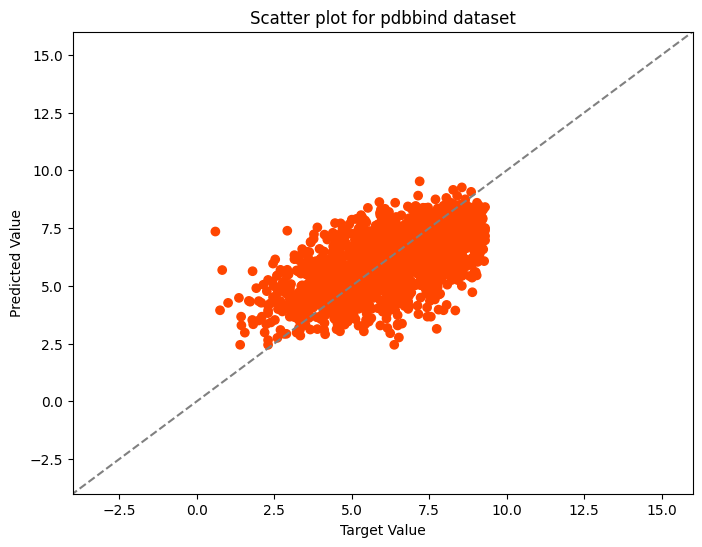

In [69]:
from matplotlib.colors import ListedColormap
# pastel_cmap = ListedColormap(["#FF4500", "#20B2AA"])
pastel_cmap = ListedColormap(["#FF4500"])

plt.figure(figsize = (8, 6))

scatter = plt.scatter(df_outer_MAE['target'], df_outer_MAE['pred'],
                      c=df_outer_MAE['target'],
                      cmap = pastel_cmap)

# 대각선 추가
min_val = min(df_outer_MAE['target'].min(), df_outer_MAE['pred'].min()) - 20
max_val = max(df_outer_MAE['target'].max(), df_outer_MAE['pred'].max()) + 20
plt.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--')

# legend_labels = ['Ours']
# legend_handles = scatter.legend_elements()[0]
# plt.legend(legend_handles, legend_labels)

# # esol / freesolv
# plt.xlim(-16, 10)
# plt.ylim(-16, 10)

# lipo
plt.xlim(-5, 8)
plt.ylim(-5, 8)

# pdbbind
plt.xlim(-4, 16)
plt.ylim(-4, 16)

plt.xlabel("Target Value")
plt.ylabel("Predicted Value")
plt.title(f"Scatter plot for {dataset} dataset")

# 저장
os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result\scatter_plot_outer')
plt.savefig(f'result_{dataset}_scatter_MAE.png', dpi = 300, bbox_inches = 'tight')

plt.show()

# Scatter plot (MSE) - 2개 comb

In [70]:
# df_outer_MSE['source'] = 'outer'
# df_egcn_MSE['source'] = 'egcn'
# df_combined = pd.concat([df_outer_MSE, df_egcn_MSE], ignore_index = True)

# plt.figure(figsize = (8, 6))

# from matplotlib.colors import ListedColormap
# pastel_cmap = ListedColormap(["#FF4500", "#20B2AA"])


# scatter = plt.scatter(df_combined['target'], df_combined['pred'],
#             c = df_combined['source'].apply(lambda x:0 if x == 'outer' else 1),
#             cmap = pastel_cmap)

# # 대각선 추가
# min_val = min(df_combined['target'].min(), df_combined['pred'].min()) - 20
# max_val = max(df_combined['target'].max(), df_combined['pred'].max()) + 20
# plt.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--')

# legend_labels = ['Ours', 'Original EGCN']
# legend_handles = scatter.legend_elements()[0]
# plt.legend(legend_handles, legend_labels)


# # esol / freesolv
# plt.xlim(-16, 10)
# plt.ylim(-16, 10)

# # # lipo
# # plt.xlim(-5, 8)
# # plt.ylim(-5, 8)

# # # pdbbind
# # plt.xlim(-4, 16)
# # plt.ylim(-4, 16)

# plt.xlabel("Target Value")
# plt.ylabel("Predicted Value")
# plt.title(f"Scatter plot for {dataset} dataset")

# # 저장
# os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result')
# plt.savefig(f'result_{dataset}_scatter_MSE.png', dpi = 300, bbox_inches = 'tight')

# plt.show()

# Scatter plot (MSE) - 외적

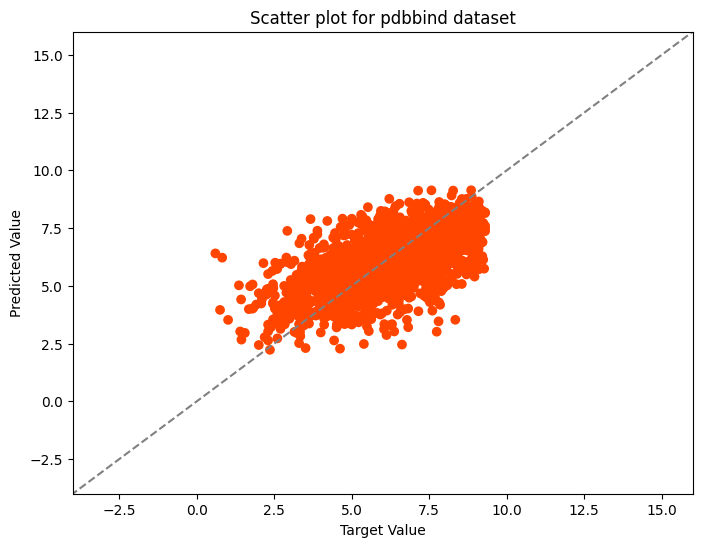

In [71]:
from matplotlib.colors import ListedColormap
# pastel_cmap = ListedColormap(["#FF4500", "#20B2AA"])
pastel_cmap = ListedColormap(["#FF4500"])

plt.figure(figsize = (8, 6))

scatter = plt.scatter(df_outer_MSE['target'], df_outer_MSE['pred'],
                      c=df_outer_MSE['target'],
                      cmap = pastel_cmap)

# 대각선 추가
min_val = min(df_outer_MSE['target'].min(), df_outer_MSE['pred'].min()) - 20
max_val = max(df_outer_MSE['target'].max(), df_outer_MSE['pred'].max()) + 20
plt.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--')

# legend_labels = ['Ours']
# legend_handles = scatter.legend_elements()[0]
# plt.legend(legend_handles, legend_labels)

# # esol / freesolv
# plt.xlim(-16, 10)
# plt.ylim(-16, 10)

# # lipo
# plt.xlim(-5, 8)
# plt.ylim(-5, 8)

# pdbbind
plt.xlim(-4, 16)
plt.ylim(-4, 16)

plt.xlabel("Target Value")
plt.ylabel("Predicted Value")
plt.title(f"Scatter plot for {dataset} dataset")

# 저장
os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result\scatter_plot_outer')
plt.savefig(f'result_{dataset}_scatter_MSE.png', dpi = 300, bbox_inches = 'tight')

plt.show()

# training 

In [72]:
# columns = ['target', 'pred'] + [f'feature{i}' for i in range(1, df_outer_train_MSE.shape[1]-1)]
# df_outer_train_MSE.columns = columns

# from matplotlib.colors import ListedColormap
# #pastel_cmap = ListedColormap(["#FF4500", "#20B2AA"])


# scatter = plt.scatter(df_outer_train_MSE['target'], df_outer_train_MSE['pred'])

# # 대각선 추가
# min_val = min(df_outer_train_MSE['target'].min(), df_outer_train_MSE['pred'].min()) - 20
# max_val = max(df_outer_train_MSE['target'].max(), df_outer_train_MSE['pred'].max()) + 20
# plt.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--')

# # legend_labels = ['Ours']
# # legend_handles = scatter.legend_elements()[0]
# # plt.legend(legend_handles, legend_labels)

# plt.show()

# Loss Function

In [73]:
# # MAE
# # loss function용 dataset
# os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result\MAE')
# loss_outer_MAE = pd.read_csv('train_losses_' + dataset + '_outer.csv')

# print(loss_outer_MAE)
# print(type(loss_outer_MAE['Train Loss'][0]))

# # str형 리스트를 리스트 타입으로 변경
# import ast
# loss_outer_MAE['Train Loss'] = loss_outer_MAE['Train Loss'].apply(ast.literal_eval)

# print(loss_outer_MAE)
# print(type(loss_outer_MAE['Train Loss'][0]))


# # MSE
# # loss function용 dataset
# os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result\MSE')
# loss_outer_MSE = pd.read_csv('train_losses_' + dataset + '_outer.csv')

# print(loss_outer_MSE)
# print(type(loss_outer_MSE['Train Loss'][0]))

# # str형 리스트를 리스트 타입으로 변경
# import ast
# loss_outer_MSE['Train Loss'] = loss_outer_MSE['Train Loss'].apply(ast.literal_eval)

# print(loss_outer_MSE)
# print(type(loss_outer_MSE['Train Loss'][0]))

In [74]:
# # 5-fold 데이터프레임 정의
# # MAE
# loss_fold_5_MAE = loss_outer_MAE['Train Loss'][4]

# df_loss_MAE = pd.DataFrame()
# df_loss_MAE['Epoch'] = range(1, 301)
# df_loss_MAE['Loss'] = loss_fold_5_MAE

# print(df_loss_MAE)

# # MSE
# loss_fold_5_MSE = loss_outer_MSE['Train Loss'][4]

# df_loss_MSE = pd.DataFrame()
# df_loss_MSE['Epoch'] = range(1, 301)
# df_loss_MSE['Loss'] = loss_fold_5_MSE

# print(df_loss_MSE)

# Loss (MAE)

In [75]:
# plt.figure(figsize = (8, 5))
# plt.plot(df_loss_MAE['Epoch'], df_loss_MAE['Loss'])

# plt.title(f'Loss Function of {dataset} dataset')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend(['Train Loss'])

# # 저장
# os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result')
# plt.savefig(f'Loss_{dataset}_MAE.png', dpi = 300, bbox_inches = 'tight')

# plt.show()

# Loss (MSE)

In [76]:
# plt.figure(figsize = (8, 5))
# plt.plot(df_loss_MSE['Epoch'], df_loss_MSE['Loss'])

# plt.title(f'Loss Function of {dataset} dataset')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend(['Train Loss'])

# # 저장
# os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result')
# plt.savefig(f'Loss_{dataset}_MSE.png', dpi = 300, bbox_inches = 'tight')

# plt.show()

# 잔차 MAE

In [77]:
# df_outer_MAE['source'] = 'outer'
# df_egcn_MAE['source'] = 'egcn'
# df_combined = pd.concat([df_outer_MAE, df_egcn_MAE], ignore_index = True)

# # 잔차차
# residuals = df_combined['target'] - df_combined['pred']

# plt.figure(figsize = (8, 6))

# from matplotlib.colors import ListedColormap
# pastel_cmap = ListedColormap(["#FF4500", "#20B2AA"])


# scatter = plt.scatter(df_combined['pred'], residuals,
#             c = df_combined['source'].apply(lambda x:0 if x == 'outer' else 1),
#             cmap = pastel_cmap)

# # 수평선 추가
# plt.axhline(0, color = 'grey', linestyle = '--')

# legend_labels = ['Ours', 'Original EGCN']
# legend_handles = scatter.legend_elements()[0]
# plt.legend(legend_handles, legend_labels)

# plt.xlim(-10, 15)
# plt.ylim(-10, 10)
# plt.xlabel("Predicted Value")
# plt.ylabel("Residual")
# plt.title(f"Residual plot for {dataset} dataset")

# # 저장
# plt.savefig(f'result_{dataset}_residual_MAE.png', dpi = 300, bbox_inches = 'tight')

# plt.show()